<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/5_Forecasting%20%7C%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/final.csv', parse_dates=['dates'],  index_col='dates',infer_datetime_format=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df

,% Silica Feed,Amina Flow,Flotation Column 01 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 02 Level,Flotation Column 03 Level,% Iron Concentrate,% Silica Concentrate,Purity
dates,,,,,,,,,,
2017-03-10 01:00:00,16.98,578.910104,251.177960,250.175988,295.096000,446.972364,450.622040,66.91,1.31,1
2017-03-10 02:00:00,16.98,537.219661,249.880589,250.033317,295.096000,450.249356,450.081222,67.06,1.11,1
2017-03-10 03:00:00,16.98,591.906744,250.161328,250.046350,295.096000,450.868711,450.901822,66.97,1.27,1
2017-03-10 04:00:00,16.98,593.170106,250.208772,250.120861,295.096000,491.462111,487.387206,66.75,1.36,1
2017-03-10 05:00:00,16.98,619.710806,249.917800,250.013500,295.096000,549.983156,549.459572,66.63,1.34,1
...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,23.20,498.785884,301.432594,299.756449,299.929000,497.870623,409.189681,65.05,1.65,1
2017-09-09 20:00:00,23.20,510.780566,300.181000,299.593867,299.526313,498.402434,392.437663,64.83,1.71,1
2017-09-09 21:00:00,23.20,519.289535,299.419465,299.995958,299.767268,500.891915,459.091225,64.29,1.80,1


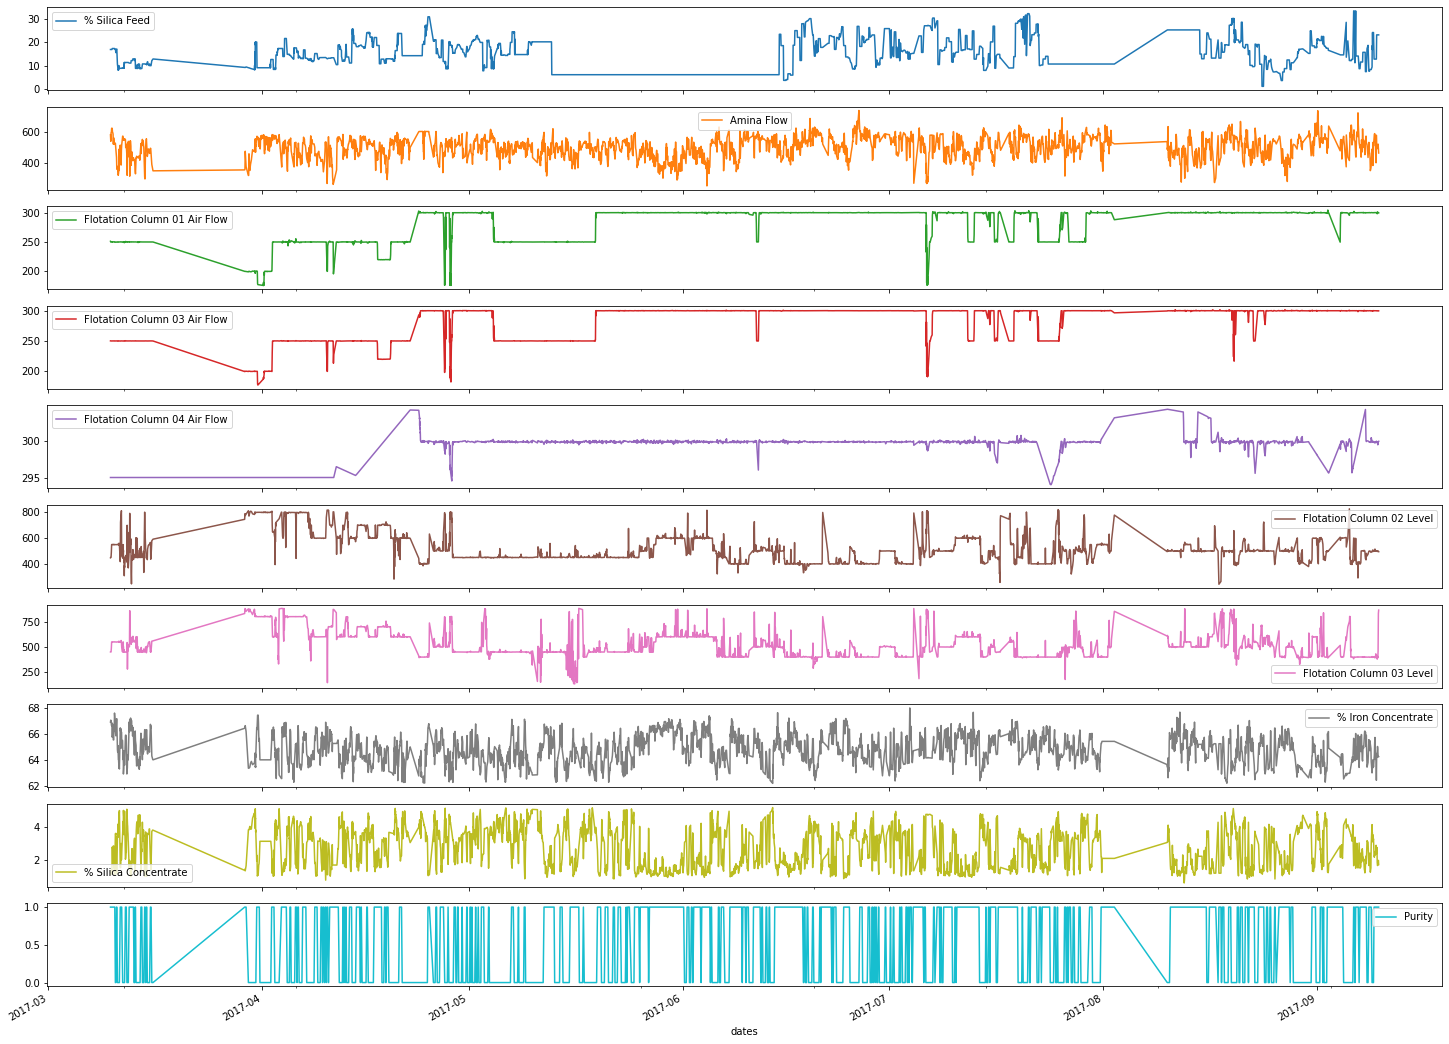

In [16]:
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.plot(subplots=True, figsize=(25,20));

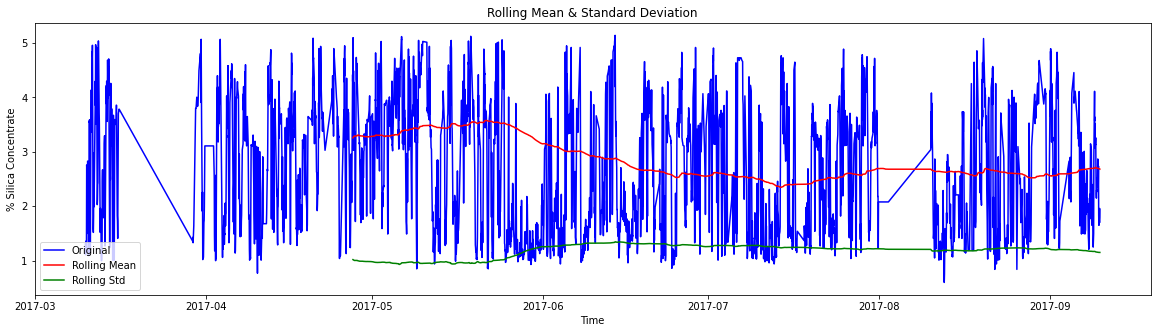

Results of Dickey-Fuller Test:
Test Statistic                -1.216868e+01
p-value                        1.437462e-22
#Lags Used                     3.000000e+00
Number of Observations Used    3.801000e+03
Critical Value (1%)           -3.432072e+00
Critical Value (5%)           -2.862301e+00
Critical Value (10%)          -2.567175e+00
dtype: float64
The timeseries is stationary at 95% level of confidence


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, rolling):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')

    plt.xlabel('Time')
    plt.ylabel('% Silica Concentrate')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The timeseries is stationary at 95% level of confidence')
    else:
        print('The timeseries is not stationary at 95% level of confidence')
  

test_stationarity(df['% Silica Concentrate'], rolling=1000)


Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations (seasonality).

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

values = df[['% Silica Concentrate']].values

# Normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(values)

# 70% 15% 15%
train, test, val = scaled_data[0:2664], scaled_data[2664:3235], scaled_data[3235:]
history = [x for x in train]

predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

In [23]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  
    mae = np.mean(np.abs(forecast - actual))    
    rmse = np.mean((forecast - actual)**2)**.5  

    return mape, mae, rmse

In [26]:
Inverse_test = test.reshape(-1,1)
Inverse_test = scaler.inverse_transform(Inverse_test)
Inverse_predictions = predictions
Inverse_predictions = scaler.inverse_transform(Inverse_predictions)

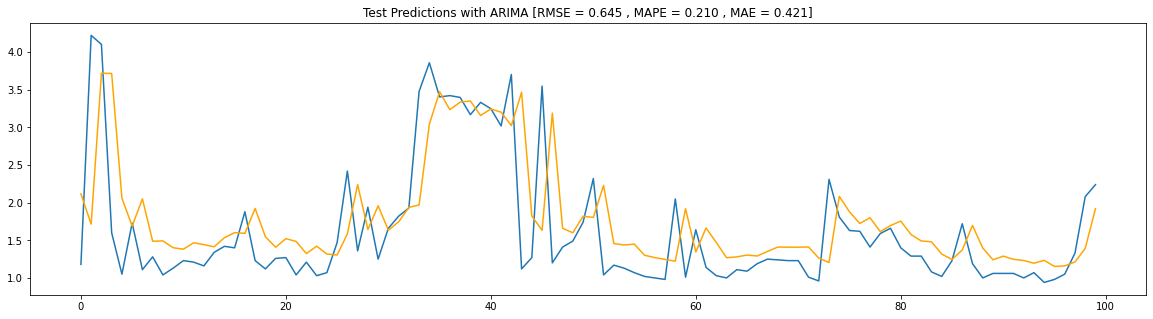

In [29]:
from matplotlib import pyplot

mape, mae, rmse = forecast_accuracy(Inverse_predictions, Inverse_test)

fig, ax = plt.subplots(figsize=(20,5))

# plot forecasts against actual outcomes
pyplot.plot(Inverse_test[0:100])
pyplot.plot(Inverse_predictions[0:100], color='orange')
plt.title("Test Predictions with ARIMA [RMSE = %.3f , MAPE = %.3f , MAE = %.3f]" % (rmse, mape, mae) )
pyplot.show()

In [ ]:
''' from pmdarima.arima import auto_arima

test = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) 
                  
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2636.738, Time=5.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2358.543, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2523.690, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2576.984, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2360.543, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2608.982, Time=1.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2559.766, Time=1.93 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2684.152, Time=4.95 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2685.750, Time=5.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.65 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2643.474, Time=6.45 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2691.665, Time=6.07 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2617.056, Time=1.21 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-2680.290, Time=7.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2606.147, Time=1.34 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2616.939, Time=0.88 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.91 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=1.99 sec

Best model:  ARIMA(4,1,1)(0,0,0)[0] intercept
Total fit time: 81.441 seconds
                  '''